Reference:
<br> Loy, James. "Neural Network Projects With Python". Packt. Feb 2019.

# Denoising Documents with Autoencoders

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/N/Projects/Denoise using Autoencoder/Noisy_Documents.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [0]:
noisy_imgs_path = 'Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

In [0]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [0]:
X_train_noisy = []
for file in sorted(os.listdir(noisy_imgs_path)):
  img = load_img(noisy_imgs_path + file, color_mode='grayscale', target_size=(420,540))
  img = img_to_array(img).astype('float32')/255
  X_train_noisy.append(img)

X_train_noisy = np.array(X_train_noisy)

In [0]:
print(X_train_noisy.shape)

(216, 420, 540, 1)


216 images, each with 420x540x1(weight, height, channel)

In [0]:
X_train_clean = []
for file in sorted(os.listdir(clean_imgs_path)):
  img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420, 540))
  img = img_to_array(img).astype('float32')/255
  X_train_clean.append(img)

# convert to numpy array
X_train_clean = np.array(X_train_clean)

In [0]:
import random
from matplotlib import pyplot as plt

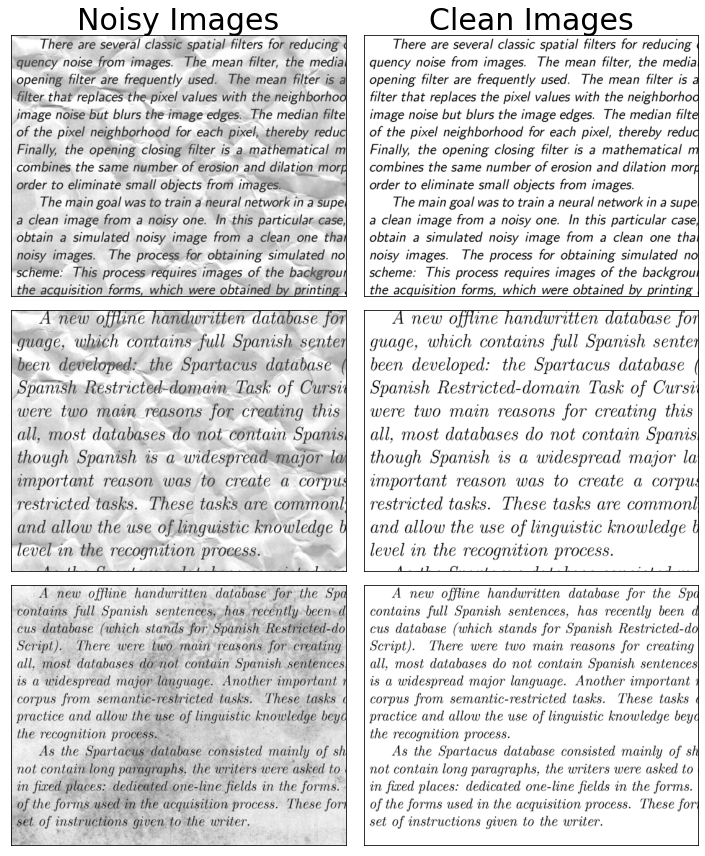

In [0]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,12))

randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]),3)

# Plot noisy images on the left
for i, ax in enumerate([ax1, ax3, ax5]):
  ax.imshow(X_train_noisy[i].reshape(420, 540), cmap='gray')
  if i == 0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Plot clean images on the right
for i, ax in enumerate([ax2, ax4, ax6]):
  ax.imshow(X_train_clean[i].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [0]:
# Use the first 20 noisy images as testing images
X_test_noisy = X_train_noisy[:20, ]
X_train_noisy = X_train_noisy[21:, ]

# Use the first 20 clean images as testing images
X_test_clean = X_train_clean[:20, ]
X_train_clean = X_train_clean[21:, ]

## Basic Convolutional Autoencoder

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D

In [0]:
basic_conv_autoencoder = Sequential()

In [0]:
# Single encoder conv layer
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420,540,1)))

In [0]:
# Single decoder convlayer
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

In [0]:
# Output layer
basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [0]:
basic_conv_autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 420, 540, 8)       80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 420, 540, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [0]:
basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 7s 38ms/step - loss: 0.7847
Epoch 2/10
195/195 [==============================] - 1s 3ms/step - loss: 0.7001
Epoch 3/10
195/195 [==============================] - 1s 3ms/step - loss: 0.6556
Epoch 4/10
195/195 [==============================] - 1s 3ms/step - loss: 0.6142
Epoch 5/10
195/195 [==============================] - 1s 3ms/step - loss: 0.5693
Epoch 6/10
195/195 [==============================] - 1s 3ms/step - loss: 0.5185
Epoch 7/10
195/195 [==============================] - 1s 3ms/step - loss: 0.4580
Epoch 8/10
195/195 [==============================] - 1s 3ms/step - loss: 0.3934
Epoch 9/10
195/195 [==============================] - 1s 3ms/step - loss: 0.3337
Epoch 10/10
195/195 [==============================] - 1s 3ms/step - loss: 0.2898


In [0]:
output = basic_conv_autoencoder.predict(X_test_noisy)

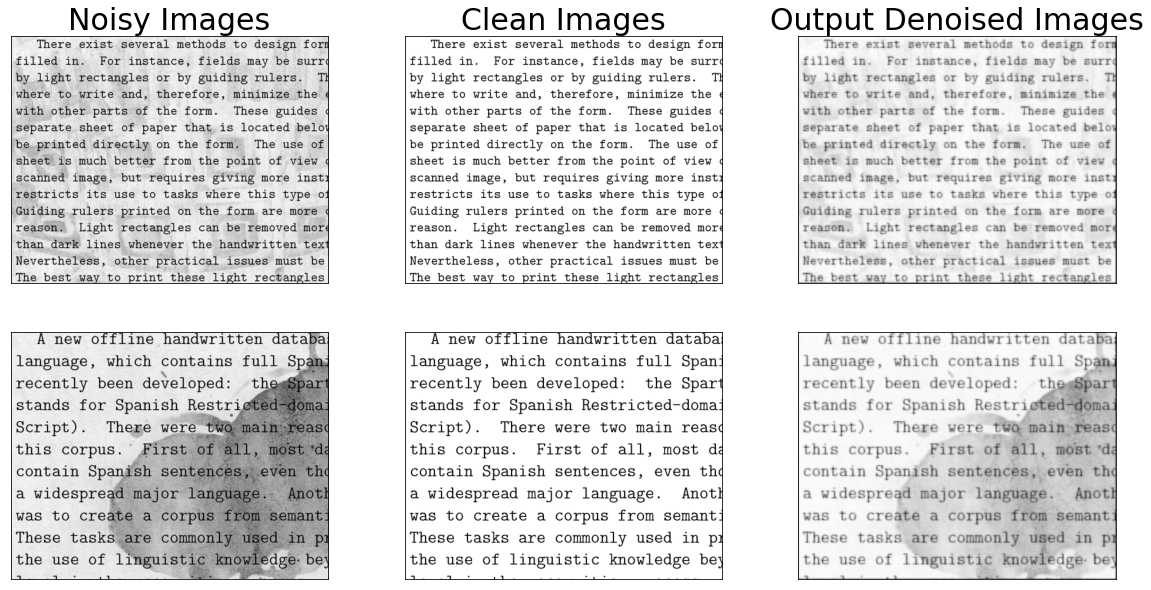

In [0]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))
randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]), 2)

for i, ax in enumerate([ax1, ax4]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Noisy Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_clean[idx].reshape(420, 540), cmap='gray')
  if i == 0:
    ax.set_title("Clean Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx = randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420, 540), cmap='gray')
  if i == 0:
    ax.set_title("Output Denoised Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

### Deep Convolutional Autoencoder

In [0]:
conv_autoencoder = Sequential()

In [0]:
# Three Conv layers in encoder
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(420, 540, 1), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

In [0]:
# Three Conv layers in decoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

In [0]:
# Output layer
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [0]:
conv_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 420, 540, 1)      

In [0]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 5s 26ms/step - loss: 0.6832
Epoch 2/10
195/195 [==============================] - 2s 10ms/step - loss: 0.4555
Epoch 3/10
195/195 [==============================] - 2s 10ms/step - loss: 0.3442
Epoch 4/10
195/195 [==============================] - 2s 10ms/step - loss: 0.3131
Epoch 5/10
195/195 [==============================] - 2s 10ms/step - loss: 0.3029
Epoch 6/10
195/195 [==============================] - 2s 10ms/step - loss: 0.2900
Epoch 7/10
195/195 [==============================] - 2s 10ms/step - loss: 0.2719
Epoch 8/10
195/195 [==============================] - 2s 10ms/step - loss: 0.2425
Epoch 9/10
195/195 [==============================] - 2s 10ms/step - loss: 0.2068
Epoch 10/10
195/195 [==============================] - 2s 10ms/step - loss: 0.1803


In [0]:
output=conv_autoencoder.predict(X_test_noisy)

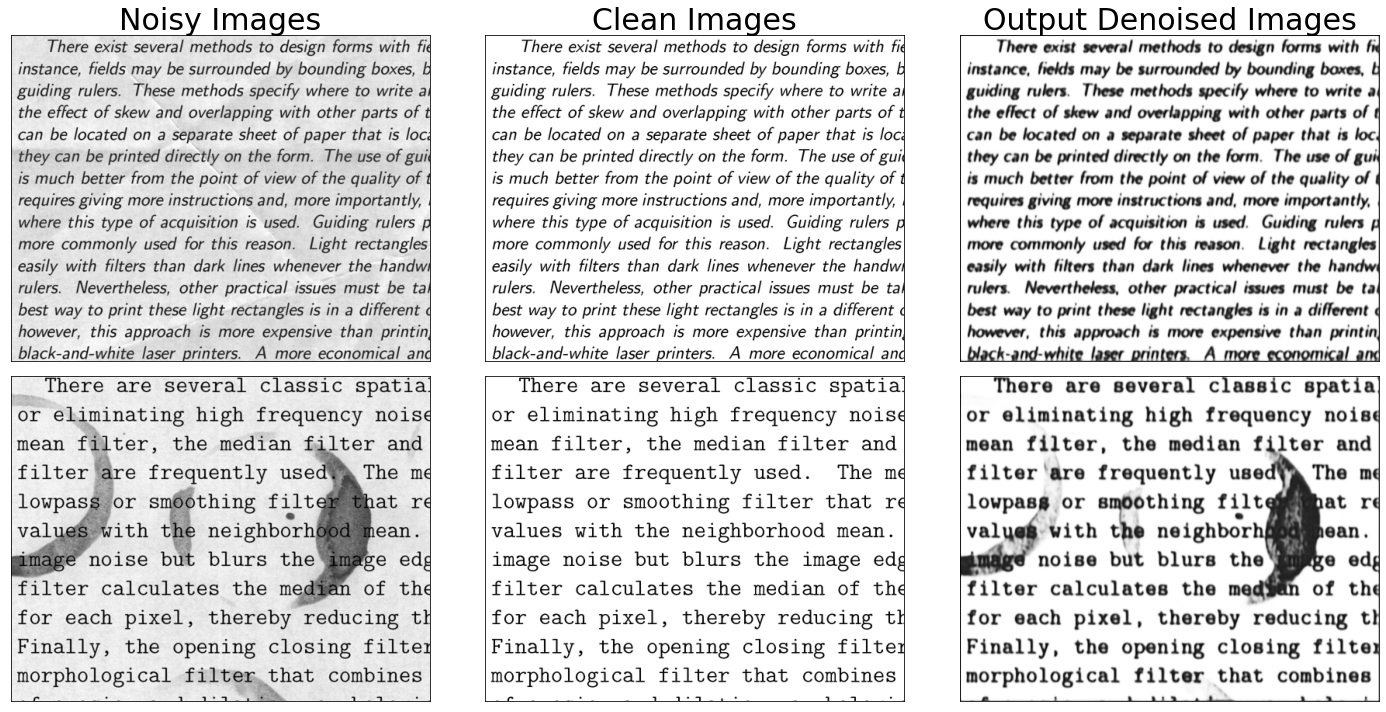

In [0]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))
randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]), 2)

for i, ax in enumerate([ax1, ax4]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Noisy Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_clean[idx].reshape(420, 540), cmap='gray')
  if i == 0:
    ax.set_title("Clean Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx = randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420, 540), cmap='gray')
  if i == 0:
    ax.set_title("Output Denoised Images", size = 30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()